In [2]:
import pandas as pd
import numpy as np
#import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline

I looked at the oil pipeline accidents data, which seemed more interesting and more suited for the task.

## Description of the data set
This data set is a record of oil pipeline accidents that occurred between 2010 and 2017. It records injuries and fatalities, the causes of the accidents, and also the costs associated with pipeline leaks and spills.

The dataset is owned by and maintained by the Department of Transportation's Pipeline and Hazardours Materials Safety Administration and was last updated in 2017, which means accidents occuring after that date are not included.

This is an increadibly interesting set of data since it provides a glimpse into some of the hazards surrounding the maintenance of the pipeline.

## First pass through the data - summary statistics and first look at the variables

The years indicated in the data description do appear in the data set.

In [3]:
pipeline = pd.read_csv('oil_pipeline_accidents.csv')

In [4]:
#confirm that there is data for all of the years indicated.
pipeline['Accident Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

### An initial quick look at the data:

In [5]:
pipeline.head()
#.unstack()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


The data set includes 48 columns or variables and has some missing data, indicated by the presence of NaN values in the data set. It also seems like each accident is associated with a report number, so there is potential to get details for specific accidents that may not be present in this data set, if the reports can be requested.

It's interesting that the fatalities are broken down into categories that include public and 'other' fatalities and it may be interesting to compare these categories to see who is effected more during a pipeline accident. The costs are also broken down really well and include damages to property (the pipeline), damage to public/private property, costs of the emergency response, costs for environmental remediation, and also additional, uncategorized costs.

This data set appears really robust and has enough information in it to ask some intereting and insightful questions.

### Examining dimensions of the data and looking at some summary statistics:

In [6]:
pipeline.shape

(2795, 48)

This data set has 48 variables and 2,795 observations, which means that there were 2,795 accidents that occurred on the pipeline between 2010 and 2017.

In [7]:
pipeline.describe(include = 'object')

,Accident Date/Time,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Cause Category,Cause Subcategory,Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time
count,2795,2795,2674,2795,2777,2795,1349,222,2480,2720,2783,2795,2795,2795,2795,2583,1390,1341
unique,2777,229,1977,2,4,5,8,69,1027,678,46,7,38,2,2,2,1385,1334
top,12/28/2013 9:30 AM,ENTERPRISE CRUDE PIPELINE LLC,WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,CRUDE OIL,"DIESEL, FUEL OIL, KEROSENE, JET FUEL",PROPANE,CUSHING,HARRIS,TX,MATERIAL/WELD/EQUIP FAILURE,INTERNAL,NO,NO,YES,9/27/2013 11:30,12/12/2011 14:40
freq,2,195,20,2777,1475,1398,408,26,78,167,1004,1435,362,2700,2780,1395,2,2


In [8]:
pipeline.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


This initial general summary of the variables in the data set is starting to reveal a few interesting things. First, it seems like there is a large range of the volumen (in barrels) of the liquid released (both intentional and unintentional release) and the range of the volume of the liquid recovered is much narrower. This suggests that there is still a lot of room to improve in the recovery methods.

The number of fatalities is fairly low, considering that the period spans eight years, which suggests that these accidents do not have a large impact on the number of human lives lost. Unfortunately, this data set does not quantify the impact to wild life (both in the number of animals killed or the extent of the impact to the animal habitats). The impact on wild life from these accidents would be a really intersting additional component to add to the analytics of this data set!

It is also noteworthy to mention that the actual costs associated with the accidents are wildly different. The range is from a few thousand to millions and it would be worthwhile to examine the factors that may drive up the costs associated with the accident.

In [10]:
pipeline.groupby('Accident Year').size()

Accident Year
2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
dtype: int64

Since year 2017, of this dataset, has only 2 observation, it will be excluded. The data for year 2017 seems to be incomplete since the number of observations is hundreds fewer than in other years.

In [11]:
pipeline = pipeline.loc[pipeline['Accident Year'] < 2017]

### Summary statistics of some interesting variables.

*This data set provides values of the various costs associated with the accident, as well as the number of barrels spilled and recovered and it would be interesting to examine some of these more closely.*

The average and median costs of property damaged during the accidents is 112,356 dollars and 3,000. This means that there are some accidents, which are outliers, and are much more expensive than most accidents that take place. They pull the average costs up from the median by over 100 thousand dollars.

In [13]:
pipeline['Property Damage Costs'].mean()

112356.25987078248

In [14]:
pipeline['Property Damage Costs'].median()

3000.0

When the general costs associated with damaged property are compared to costs associated with damages to public or private property, it becomes clear that most of the costs of damage are coming from damage to the company property. On average costs of damage to public or private proerty (aka not company property) are 75 thousand dollar less. The median costs to public and private property are zero, which means that most accidents result in very little damage to public or private property.

In [15]:
pipeline['Public/Private Property Damage Costs'].mean()

25140.00251527129

In [16]:
pipeline['Public/Private Property Damage Costs'].median()

0.0

### Do intentional releases of liquid follow similar trends as unintentional releases from year to year?

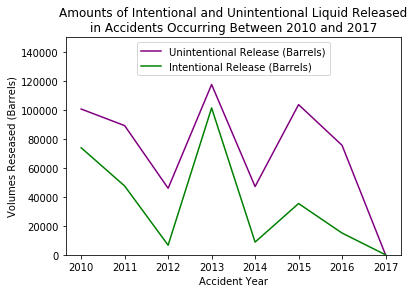

In [40]:
sum_by_year = pipeline.groupby(['Accident Year'])['Unintentional Release (Barrels)',
                                                  'Intentional Release (Barrels)'].sum().reset_index()
sum_by_year.plot(x = 'Accident Year', 
                 y = ['Unintentional Release (Barrels)', 'Intentional Release (Barrels)'], 
                 color = ['purple', 'green'])
plt.title('Amounts of Intentional and Unintentional Liquid Released\nin Accidents Occurring Between 2010 and 2017')
plt.ylabel("Volumes Reseased (Barrels)")
plt.ylim(0, 150000)
plt.legend(loc = 'upper center')


Looking at the volumes of liquid released shows that both intentional and unintentional released volumes largely follow the same patterns over the years. Specifically, from 2010 to 2014 the patterns of both types of releases are very similar and differ in the magniture of the volume. During those 5 years it seems like there was a large correlation between the two types of releases - when the intentional release volume went up/down, so did the unintentional release volume. The pattern continues past 2014; however, there is slightly less concordance between the two release types. Although the unintentional release trend follows the trend of the intentional release, the volumes of the unintentional release are much larger than the volumes of the intentional release during those years.

### Where do the most accidents take place?

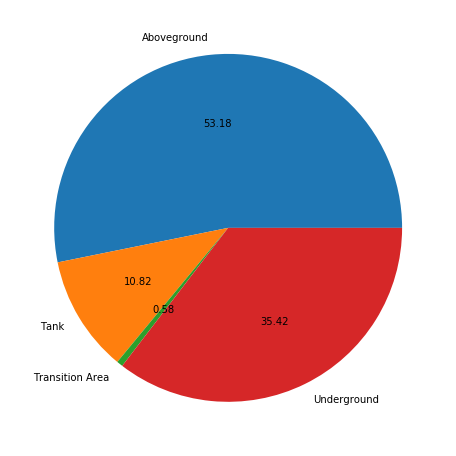

In [17]:
plt.figure(figsize = (8, 8))
values = [1479, 301, 16, 985] 
labels = ['Aboveground', 'Tank', 'Transition Area', 'Underground'] 
plt.pie(values, labels=labels, autopct='%.2f')
plt.show()

More than half of the accidents recorded in this data set occur at above ground locations of the pipeline. The second most frequent location of accidents on the pipeline occur under ground (about 35%). There are also accidents happening in tanks and a smattering of accidents occuring in what is termed the 'transition' area, which may refer to a point of transfer from the pipe to a tank or another container. (Specific values are reported below).

In [20]:
location = pipeline.groupby(['Pipeline Type']).size()
print(location)

Pipeline Type
ABOVEGROUND        1474
TANK                301
TRANSITION AREA      16
UNDERGROUND         984
dtype: int64


### Are there years where the number of accidents is much greater than in other years or where the location of the accidents is different than in the general trend of the data?

#### What is the year where the most number of accidents took place? The least?

In [21]:
yearly_accidents = pipeline.groupby('Accident Year').size().reset_index(name = 'Number of Accidents')

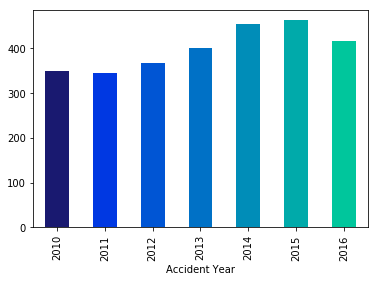

In [22]:
colors = ['#191970', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00FF80']
yearly_accidents.plot(kind = 'bar',
                      x = 'Accident Year',
                      y = 'Number of Accidents',
                      legend = False,
                      color = colors
                     )

2015 is the year with the most accidents, followed closely by 2014. The years with th least number of accidents are 2011, followed closely by 2010 (2017 was excluded due to being incomplete).

#### Is the trend showing that most accidents occur above ground, which is observed in the data at a high level, also present from year to year?

Count the number of accidents occurring within each of the four categorizations by year.

In [24]:
years = pipeline.groupby(['Accident Year',
                          'Pipeline Type']).size().reset_index(name = 'Number of Accidents')

print(years)

    Accident Year    Pipeline Type  Number of Accidents
0            2010      ABOVEGROUND                  166
1            2010             TANK                   37
2            2010  TRANSITION AREA                    3
3            2010      UNDERGROUND                  140
4            2011      ABOVEGROUND                  174
5            2011             TANK                   25
6            2011  TRANSITION AREA                    4
7            2011      UNDERGROUND                  139
8            2012      ABOVEGROUND                  191
9            2012             TANK                   47
10           2012  TRANSITION AREA                    1
11           2012      UNDERGROUND                  124
12           2013      ABOVEGROUND                  200
13           2013             TANK                   33
14           2013  TRANSITION AREA                    1
15           2013      UNDERGROUND                  166
16           2014      ABOVEGROUND              

Graph the counts of different accident types over the years.

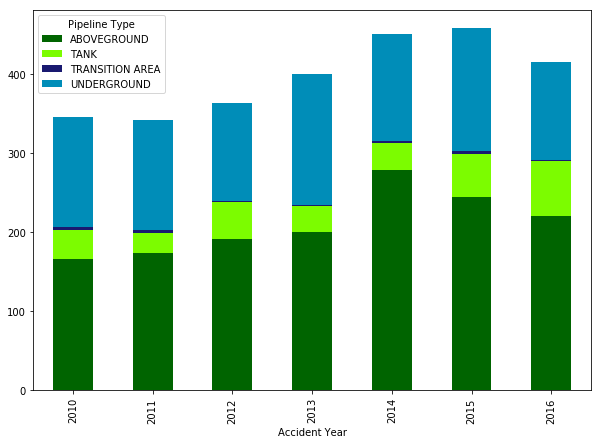

In [25]:

colors = ["darkgreen", "lawngreen", '#191970', '#008DB8']
pivot_years = years.pivot(index = 'Accident Year', columns = 'Pipeline Type', values = 'Number of Accidents')
#pivot_years
pivot_years.plot.bar(stacked = True, color = colors, figsize = (10, 7) )

While in the data overall, above ground accidents predominate, there are a couple of years where the underground accidents come very close to the number of above ground accidents. This is the case for years 2010 and 2011, where the values of both types are of accidents are much closer than they are for the other years, where the above ground accidents dominate the counts. 2017 has only two accidents, so is not really good in terms of comparison purposes.

### How do variaous accidents' costs change from year to year?

In [26]:
sum_of_cost = pipeline.groupby(['Accident Year']).sum()
#print(sum_of_cost)

There is one instance of a disproportionate cost, which is around 800,000,000 million dollars, and which is an outlier in this data set. This value was removed, so that a more accurate representation of the costs as they vary by year could be obtained.

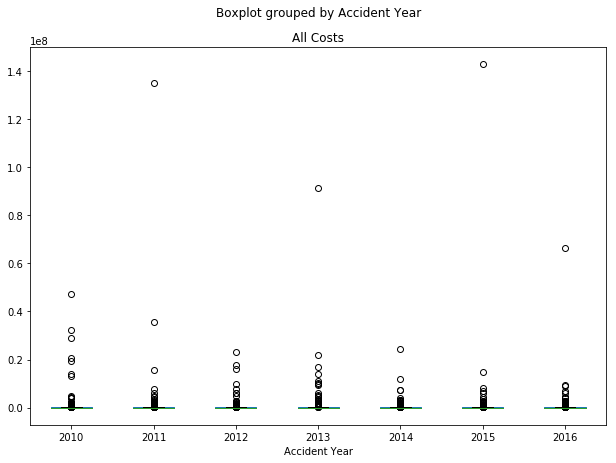

In [27]:
smaller = pipeline.loc[(pipeline['All Costs'] < 700000000) &
                       (pipeline['Accident Year'] < 2017)]
smaller.boxplot(by = 'Accident Year', column = ['All Costs'], grid = False, figsize = (10, 7))

It seems that in general the costs associated with accidents do not vary too much from year to year. It seems like each year has a few outlying costs, which are much higher than the rest, but the number of these is, in general, consistent from year to year. There are some years where there is one accident, which ends up costig and exorbitant amount; however, the number of these accidents is very small and occurs no more than once every couple of years.

### Are there years where the amount of barrels recovered is close to how many were released in the accidents?

To take a look at this, a new variable 'net recovery' needs to be computed from the data. It will e the difference between the amount of liquid barrels recovered and the reported net loss (in barrels).

In [28]:
pipeline['net_recovery'] = pipeline['Liquid Recovery (Barrels)'] - pipeline['Net Loss (Barrels)']

It is interesting to compare the net recovery over the years, to see if some years showed more successful recovery efforts.

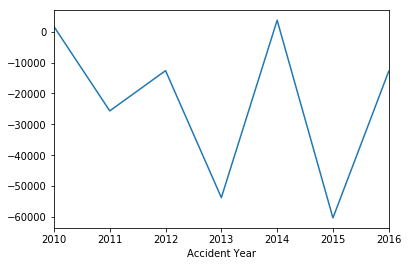

In [29]:
recovery_by_year = pipeline.groupby(['Accident Year'])['net_recovery'].sum()
recovery_by_year.plot(kind = 'line', x = 'Accident Year', y = 'net_recovery')

When the computed net recovery is compared from year to year, it seems like there are years where the recovery efforts could be considered excellent, all of the barrels were recovered, and some years where the recovery was very poor. Years 2013 and 2015 seem particularly poor.

Also, it's important to note that in year 2014 the amount recovered seems to exceed the amount released during the accident and this warrants further investigation. Perhaps additional liquid was counted during the recovery, such as for example liquid chemicals which may have been used to aid the recovery effort.

### Proposal for further research.

It would be interesting to get further information on the different techniques used in the recovery effort and then test the various techniques for effectiveness. A statistical test could be used to test which techniques resulted in significantly greater recovery volumes or usupervised learning may be used to identify the most effective technique.

It would also be increadily interesting to study the factors that may lead to the accidents occuring. For example, are there weather events, lapses in maintenance, or even personel turn over that may cause some of the accidents. This could be answered with some more advanced modeling techniques, perhaps network analysis that would identify the chain of factors that consistently lead to accidents. Additional data would need to be gathered.